In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 8

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/3 [=========>....................] - ETA: 2s - loss: 2.2641 - accuracy: 0.1172
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 2s 254ms/step - loss: 2.2515 - accuracy: 0.0959 - val_loss: 2.1616 - val_accuracy: 0.0984
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1487 - accuracy: 0.1172
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 52ms/step - loss: 2.2094 - accuracy: 0.0877 - val_loss: 2.1396 - val_accuracy: 0.0984
Epoch 3/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2154 - accuracy: 0.0703
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 48ms/step - loss: 2.1961 - accuracy: 0.0904 - val_loss: 2.1200 - val_accuracy: 0.0984
Epoch 4/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1717 - accuracy: 0.1172
Epoch 4: sa

3/3 [==============================] - 0s 44ms/step - loss: 1.8559 - accuracy: 0.3397 - val_loss: 1.8309 - val_accuracy: 0.3197
Epoch 29/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8524 - accuracy: 0.3359
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 1.8290 - accuracy: 0.3808 - val_loss: 1.8193 - val_accuracy: 0.3197
Epoch 30/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8058 - accuracy: 0.3984
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 44ms/step - loss: 1.8129 - accuracy: 0.3863 - val_loss: 1.8085 - val_accuracy: 0.3197
Epoch 31/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7704 - accuracy: 0.3594
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 1.8198 - accuracy: 0.3534 - val_loss: 1.

Epoch 56/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5331 - accuracy: 0.4688
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 1.5855 - accuracy: 0.4110 - val_loss: 1.5522 - val_accuracy: 0.4344
Epoch 57/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7223 - accuracy: 0.3203
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 1.6190 - accuracy: 0.4027 - val_loss: 1.5439 - val_accuracy: 0.4344
Epoch 58/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5934 - accuracy: 0.3906
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 1.5711 - accuracy: 0.4137 - val_loss: 1.5361 - val_accuracy: 0.4344
Epoch 59/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5758 - accuracy: 0.4531
Epoch

1/3 [=========>....................] - ETA: 0s - loss: 1.3960 - accuracy: 0.4844
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 44ms/step - loss: 1.3947 - accuracy: 0.4986 - val_loss: 1.2882 - val_accuracy: 0.5082
Epoch 84/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3698 - accuracy: 0.5000
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 54ms/step - loss: 1.3510 - accuracy: 0.5178 - val_loss: 1.2745 - val_accuracy: 0.5082
Epoch 85/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3773 - accuracy: 0.4609
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 50ms/step - loss: 1.3722 - accuracy: 0.4740 - val_loss: 1.2611 - val_accuracy: 0.5164
Epoch 86/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2765 - accuracy: 0.4844
Epoch 86: saving mo

1/3 [=========>....................] - ETA: 0s - loss: 1.1449 - accuracy: 0.5547
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 49ms/step - loss: 1.1996 - accuracy: 0.5342 - val_loss: 1.0469 - val_accuracy: 0.6721
Epoch 111/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1723 - accuracy: 0.5547
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 48ms/step - loss: 1.1838 - accuracy: 0.5397 - val_loss: 1.0399 - val_accuracy: 0.6721
Epoch 112/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2140 - accuracy: 0.5391
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 50ms/step - loss: 1.1840 - accuracy: 0.5233 - val_loss: 1.0327 - val_accuracy: 0.6721
Epoch 113/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1767 - accuracy: 0.4766
Epoch 113: sa

1/3 [=========>....................] - ETA: 0s - loss: 1.1097 - accuracy: 0.5312
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 1.1146 - accuracy: 0.5452 - val_loss: 0.9088 - val_accuracy: 0.7131
Epoch 138/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0966 - accuracy: 0.4844
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 48ms/step - loss: 1.0629 - accuracy: 0.5507 - val_loss: 0.9063 - val_accuracy: 0.7131
Epoch 139/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1956 - accuracy: 0.4766
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 45ms/step - loss: 1.0792 - accuracy: 0.5671 - val_loss: 0.9023 - val_accuracy: 0.7131
Epoch 140/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0296 - accuracy: 0.6016
Epoch 140: sa

1/3 [=========>....................] - ETA: 0s - loss: 1.0211 - accuracy: 0.5703
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 1.0382 - accuracy: 0.5479 - val_loss: 0.8164 - val_accuracy: 0.7213
Epoch 165/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9796 - accuracy: 0.6094
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 1.0186 - accuracy: 0.5699 - val_loss: 0.8142 - val_accuracy: 0.7295
Epoch 166/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9749 - accuracy: 0.5859
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 52ms/step - loss: 1.0315 - accuracy: 0.5726 - val_loss: 0.8105 - val_accuracy: 0.7295
Epoch 167/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0878 - accuracy: 0.5000
Epoch 167: sa

1/3 [=========>....................] - ETA: 0s - loss: 1.0103 - accuracy: 0.5781
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 0.9275 - accuracy: 0.6274 - val_loss: 0.7413 - val_accuracy: 0.7705
Epoch 192/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9778 - accuracy: 0.5781
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 50ms/step - loss: 0.9567 - accuracy: 0.6082 - val_loss: 0.7382 - val_accuracy: 0.7705
Epoch 193/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8925 - accuracy: 0.6484
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 0.9083 - accuracy: 0.6411 - val_loss: 0.7349 - val_accuracy: 0.7705
Epoch 194/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8655 - accuracy: 0.6406
Epoch 194: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8605 - accuracy: 0.6250
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 40ms/step - loss: 0.8843 - accuracy: 0.6274 - val_loss: 0.6691 - val_accuracy: 0.7787
Epoch 219/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9496 - accuracy: 0.6172
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 45ms/step - loss: 0.9753 - accuracy: 0.6110 - val_loss: 0.6686 - val_accuracy: 0.7787
Epoch 220/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9049 - accuracy: 0.6016
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 48ms/step - loss: 0.9479 - accuracy: 0.5890 - val_loss: 0.6687 - val_accuracy: 0.7787
Epoch 221/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9649 - accuracy: 0.6328
Epoch 221: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8374 - accuracy: 0.6875
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 44ms/step - loss: 0.8578 - accuracy: 0.6384 - val_loss: 0.6174 - val_accuracy: 0.8525
Epoch 246/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9135 - accuracy: 0.6406
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 0.8615 - accuracy: 0.6603 - val_loss: 0.6172 - val_accuracy: 0.8525
Epoch 247/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8792 - accuracy: 0.6484
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 49ms/step - loss: 0.9401 - accuracy: 0.6329 - val_loss: 0.6150 - val_accuracy: 0.8525
Epoch 248/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8785 - accuracy: 0.6406
Epoch 248: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8315 - accuracy: 0.6406
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 42ms/step - loss: 0.8569 - accuracy: 0.6548 - val_loss: 0.5791 - val_accuracy: 0.8525
Epoch 273/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6243 - accuracy: 0.6875
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 48ms/step - loss: 0.7929 - accuracy: 0.6603 - val_loss: 0.5774 - val_accuracy: 0.8525
Epoch 274/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9259 - accuracy: 0.6016
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 45ms/step - loss: 0.8823 - accuracy: 0.6438 - val_loss: 0.5766 - val_accuracy: 0.8525
Epoch 275/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8234 - accuracy: 0.6406
Epoch 275: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.9105 - accuracy: 0.6250
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 0.7771 - accuracy: 0.7151 - val_loss: 0.5376 - val_accuracy: 0.8525
Epoch 300/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8958 - accuracy: 0.6094
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 50ms/step - loss: 0.8200 - accuracy: 0.6548 - val_loss: 0.5357 - val_accuracy: 0.8525
Epoch 301/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8360 - accuracy: 0.6172
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 53ms/step - loss: 0.7700 - accuracy: 0.6575 - val_loss: 0.5346 - val_accuracy: 0.8525
Epoch 302/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7917 - accuracy: 0.7109
Epoch 302: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7558 - accuracy: 0.7344
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 0.7433 - accuracy: 0.7123 - val_loss: 0.5034 - val_accuracy: 0.8525
Epoch 327/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8429 - accuracy: 0.6484
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 0.8410 - accuracy: 0.6630 - val_loss: 0.5034 - val_accuracy: 0.8525
Epoch 328/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8266 - accuracy: 0.6641
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 45ms/step - loss: 0.7487 - accuracy: 0.6932 - val_loss: 0.5043 - val_accuracy: 0.8525
Epoch 329/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7202 - accuracy: 0.7031
Epoch 329: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7205 - accuracy: 0.7188
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 0.7387 - accuracy: 0.7233 - val_loss: 0.4739 - val_accuracy: 0.8525
Epoch 354/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7564 - accuracy: 0.7188
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 0.7905 - accuracy: 0.6904 - val_loss: 0.4747 - val_accuracy: 0.8525
Epoch 355/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6319 - accuracy: 0.7500
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 45ms/step - loss: 0.7480 - accuracy: 0.7041 - val_loss: 0.4760 - val_accuracy: 0.8443
Epoch 356/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7813 - accuracy: 0.6797
Epoch 356: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.8050 - accuracy: 0.6719
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 0.7809 - accuracy: 0.6959 - val_loss: 0.4674 - val_accuracy: 0.8525
Epoch 381/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7252 - accuracy: 0.7266
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 0.7419 - accuracy: 0.7096 - val_loss: 0.4645 - val_accuracy: 0.8525
Epoch 382/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7159 - accuracy: 0.6875
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 45ms/step - loss: 0.7329 - accuracy: 0.6877 - val_loss: 0.4622 - val_accuracy: 0.8525
Epoch 383/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6613 - accuracy: 0.7500
Epoch 383: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7566 - accuracy: 0.7422
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 48ms/step - loss: 0.7472 - accuracy: 0.7014 - val_loss: 0.4395 - val_accuracy: 0.8689
Epoch 408/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7830 - accuracy: 0.6719
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 45ms/step - loss: 0.7392 - accuracy: 0.7014 - val_loss: 0.4354 - val_accuracy: 0.8607
Epoch 409/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7144 - accuracy: 0.7031
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 44ms/step - loss: 0.7315 - accuracy: 0.6959 - val_loss: 0.4319 - val_accuracy: 0.8689
Epoch 410/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7724 - accuracy: 0.6484
Epoch 410: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.6406 - accuracy: 0.7344
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 45ms/step - loss: 0.6665 - accuracy: 0.7425 - val_loss: 0.4186 - val_accuracy: 0.8525
Epoch 435/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5998 - accuracy: 0.7266
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 0.6904 - accuracy: 0.7315 - val_loss: 0.4171 - val_accuracy: 0.8525
Epoch 436/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6922 - accuracy: 0.7188
Epoch 436: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 0.6677 - accuracy: 0.7397 - val_loss: 0.4156 - val_accuracy: 0.8525
Epoch 437/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7104 - accuracy: 0.6719
Epoch 437: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.6471 - accuracy: 0.7188
Epoch 461: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 45ms/step - loss: 0.7239 - accuracy: 0.6849 - val_loss: 0.4025 - val_accuracy: 0.8525
Epoch 462/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6448 - accuracy: 0.7422
Epoch 462: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 48ms/step - loss: 0.6543 - accuracy: 0.7288 - val_loss: 0.4022 - val_accuracy: 0.8525
Epoch 463/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8378 - accuracy: 0.6562
Epoch 463: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 0.7808 - accuracy: 0.7014 - val_loss: 0.4016 - val_accuracy: 0.8525
Epoch 464/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7803 - accuracy: 0.6641
Epoch 464: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.6199 - accuracy: 0.7656
Epoch 488: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 49ms/step - loss: 0.7021 - accuracy: 0.7315 - val_loss: 0.3946 - val_accuracy: 0.8770
Epoch 489/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6824 - accuracy: 0.7109
Epoch 489: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 0.7330 - accuracy: 0.6795 - val_loss: 0.3967 - val_accuracy: 0.8770
Epoch 490/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7231 - accuracy: 0.7031
Epoch 490: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 0.7048 - accuracy: 0.6959 - val_loss: 0.3981 - val_accuracy: 0.8689
Epoch 491/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8219 - accuracy: 0.6797
Epoch 491: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.5707 - accuracy: 0.7812
Epoch 515: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 38ms/step - loss: 0.6205 - accuracy: 0.7616 - val_loss: 0.3718 - val_accuracy: 0.9098
Epoch 516/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7065 - accuracy: 0.7500
Epoch 516: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 48ms/step - loss: 0.6618 - accuracy: 0.7479 - val_loss: 0.3700 - val_accuracy: 0.9098
Epoch 517/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5505 - accuracy: 0.7891
Epoch 517: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 46ms/step - loss: 0.6343 - accuracy: 0.7315 - val_loss: 0.3692 - val_accuracy: 0.9180
Epoch 518/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7248 - accuracy: 0.7031
Epoch 518: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.6010 - accuracy: 0.7656
Epoch 542: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 45ms/step - loss: 0.6483 - accuracy: 0.7370 - val_loss: 0.3620 - val_accuracy: 0.9016
Epoch 543/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6584 - accuracy: 0.7812
Epoch 543: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 0.6529 - accuracy: 0.7644 - val_loss: 0.3610 - val_accuracy: 0.9016
Epoch 544/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7874 - accuracy: 0.6797
Epoch 544: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 50ms/step - loss: 0.6793 - accuracy: 0.7370 - val_loss: 0.3623 - val_accuracy: 0.9016
Epoch 545/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7092 - accuracy: 0.7031
Epoch 545: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.7031 - accuracy: 0.6953
Epoch 569: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 45ms/step - loss: 0.6335 - accuracy: 0.7342 - val_loss: 0.3576 - val_accuracy: 0.9098
Epoch 570/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6406 - accuracy: 0.6953
Epoch 570: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 0.6624 - accuracy: 0.7260 - val_loss: 0.3588 - val_accuracy: 0.9098
Epoch 571/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7028 - accuracy: 0.7500
Epoch 571: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 0.7109 - accuracy: 0.7041 - val_loss: 0.3605 - val_accuracy: 0.9098
Epoch 572/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8329 - accuracy: 0.6875
Epoch 572: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.6544 - accuracy: 0.6875
Epoch 596: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 0.6279 - accuracy: 0.7315 - val_loss: 0.3419 - val_accuracy: 0.9098
Epoch 597/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6355 - accuracy: 0.7422
Epoch 597: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 47ms/step - loss: 0.6375 - accuracy: 0.7479 - val_loss: 0.3403 - val_accuracy: 0.9098
Epoch 598/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7103 - accuracy: 0.7188
Epoch 598: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 52ms/step - loss: 0.6715 - accuracy: 0.7397 - val_loss: 0.3385 - val_accuracy: 0.9180
Epoch 599/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6117 - accuracy: 0.7578
Epoch 599: sa

1/3 [=========>....................] - ETA: 0s - loss: 0.6066 - accuracy: 0.7422
Epoch 623: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 41ms/step - loss: 0.6319 - accuracy: 0.7315 - val_loss: 0.3361 - val_accuracy: 0.9180
Epoch 624/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6932 - accuracy: 0.7344
Epoch 624: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 51ms/step - loss: 0.6631 - accuracy: 0.7534 - val_loss: 0.3341 - val_accuracy: 0.9180
Epoch 625/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5915 - accuracy: 0.7578
Epoch 625: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
3/3 [==============================] - 0s 45ms/step - loss: 0.5986 - accuracy: 0.7671 - val_loss: 0.3324 - val_accuracy: 0.9180
Epoch 626/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7686 - accuracy: 0.6797
Epoch 626: sa

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 55ms/step - loss: 0.3392 - accuracy: 0.9180


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

# Confusion matrix

4/4 [==============================] - 0s 2ms/step


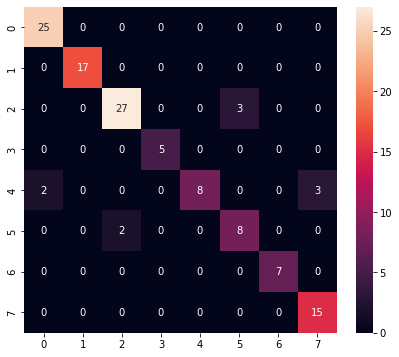

Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      1.00      1.00        17
           2       0.93      0.90      0.92        30
           3       1.00      1.00      1.00         5
           4       1.00      0.62      0.76        13
           5       0.73      0.80      0.76        10
           6       1.00      1.00      1.00         7
           7       0.83      1.00      0.91        15

    accuracy                           0.92       122
   macro avg       0.93      0.91      0.91       122
weighted avg       0.93      0.92      0.92       122



In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [15]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [16]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Asus\AppData\Local\Temp\tmpmn25mj_r\assets


6664